# Titanic Example


<!--<badge>--><a href="https://colab.research.google.com/github/TheAIDojo/Machine_Learning_Bootcamp/blob/main/Week%2003%20-%20Machine%20Learning%20Algorithms/Titanic_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->


In [ ]:
# This outputs the time it took to run each cell
!pip install ipython-autotime
%load_ext autotime

time: 235 µs (started: 2021-01-05 16:45:23 +00:00)


In [ ]:
from sklearn import datasets, model_selection, linear_model, metrics, tree, ensemble, feature_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading & Preprocessing

In [ ]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Dropping insignificant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

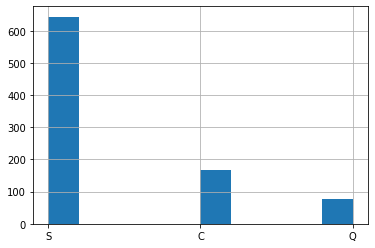

In [ ]:
# Embarked column has categrocial/discrete values, we can not find the mean for it, instead we take the mode (the value with the highest frequency)

data.Embarked.hist()

In [ ]:
# mode() returns a pd.Series of the most common value in the column
embarked_most_common = data.Embarked.mode()
data.Embarked.fillna(embarked_most_common[0], inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
data.Age.fillna(data.Age.mean(), inplace=True)
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
def create_dict(column):
  values = column.unique()
  dictionary = {}
  dictionary_rev = {}
  for index, value in enumerate(values):
    dictionary[value] = index
    dictionary_rev[index] = value

  return dictionary, dictionary_rev

In [ ]:
sex_dict, sex_dict_rev = create_dict(data.Sex)
emb_dict, emb_dict_rev = create_dict(data.Embarked)
sex_dict, sex_dict_rev, emb_dict, emb_dict_rev

({'female': 1, 'male': 0},
 {0: 'male', 1: 'female'},
 {'C': 1, 'Q': 2, 'S': 0},
 {0: 'S', 1: 'C', 2: 'Q'})

In [ ]:
data.Sex.replace(sex_dict, inplace=True)
data.Embarked.replace(emb_dict, inplace=True)

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


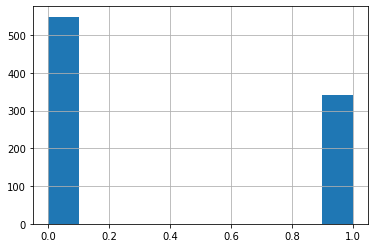

In [ ]:
data.Survived.hist()

In [ ]:
x = data.loc[:, data.columns != 'Survived']
y = data.Survived

In [ ]:
x = data[['Pclass',	'Sex',	'Age',	'SibSp',	'Parch',	'Fare',	'Embarked']]
y = data.Survived

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [ ]:
x_2 = feature_selection.SelectKBest(feature_selection.chi2, 2).fit_transform(x, y)

x_2

array([[ 0.    ,  7.25  ],
       [ 1.    , 71.2833],
       [ 1.    ,  7.925 ],
       ...,
       [ 1.    , 23.45  ],
       [ 0.    , 30.    ],
       [ 0.    ,  7.75  ]])

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_2,y, train_size=0.9, random_state=42, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((801, 2), (90, 2), (801,), (90,))

## Learning

### Logistic Regression


In [ ]:
classifier = linear_model.LogisticRegression(random_state=42)

In [ ]:
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7555555555555555

### RandomForest

In [ ]:
forest = ensemble.RandomForestClassifier()

In [ ]:
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = forest.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7777777777777778

### DecisionTree

In [ ]:
tree = tree.DecisionTreeClassifier()

In [ ]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = tree.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7777777777777778